In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


# Exploratory Data Analysis (EDA) – Spotify Music Popularity

This notebook explores what factors are linked to higher Spotify streams:
- Playlist reach
- TikTok views
- YouTube views
- Shazam counts
- Release year


## Key Insights

- Newer releases tend to achieve higher median Spotify streams
- Playlist reach shows a strong positive relationship with streaming performance
- TikTok engagement appears to significantly influence music popularity


## 1) Load dataset




In [13]:
df = pd.read_csv("../data/processed/spotify_cleaned.csv")
df.head()


,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,youtube_playlist_reach,apple_music_playlist_count,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1


### 2) Prepare data (create release_year)


In [14]:
df["release_year"] = pd.to_datetime(df["release_date"]).dt.year


## Analysis 1 – Median Spotify Streams by Release Year

This analysis explores whether newer releases tend to achieve higher streaming performance.


In [16]:
streams_by_year = (
    df.groupby("release_year")["spotify_streams"]
    .median()
    .reset_index()
)

streams_by_year.head()


,release_year,spotify_streams
0,1987,1.879386e+09
1,1991,2.021910e+09
2,1994,1.810650e+09
3,1998,1.783399e+08
4,1999,1.405354e+09


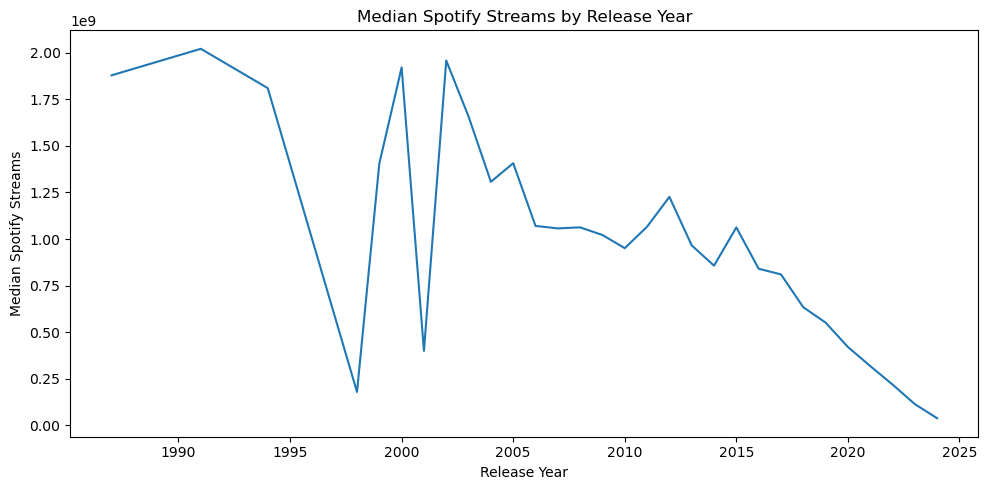

In [17]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=streams_by_year,
    x="release_year",
    y="spotify_streams"
)

plt.title("Median Spotify Streams by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Median Spotify Streams")

plt.tight_layout()
plt.show()


### Interpretation – Release Year Trend

Median Spotify streams fluctuate across years, with some older tracks showing higher median values.

Recent years show lower median streams in this dataset, which may reflect data distribution or catalog differences.

Release year alone does not fully explain streaming performance.


## Analysis 2 – Spotify Streams vs Playlist Reach

This analysis explores whether playlist exposure is associated with higher streaming performance.


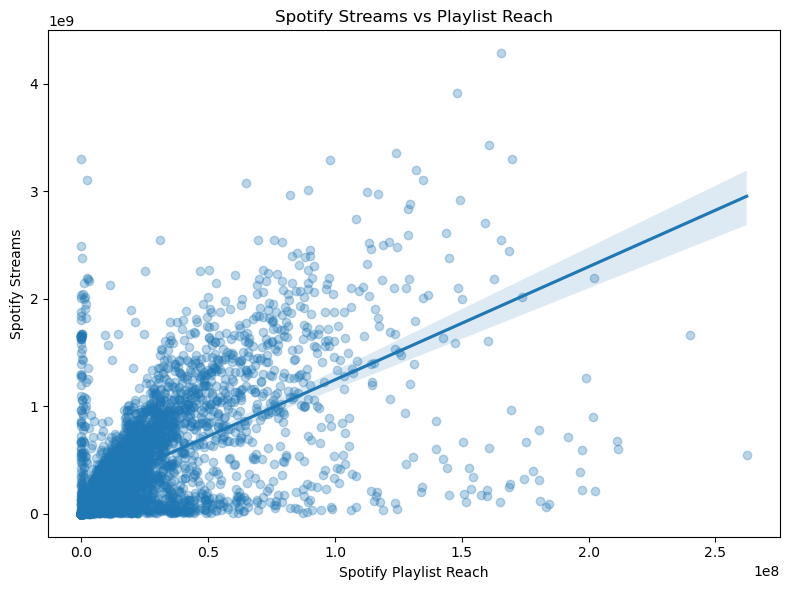

In [18]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="spotify_playlist_reach",
    y="spotify_streams",
    scatter_kws={"alpha":0.3}
)

plt.title("Spotify Streams vs Playlist Reach")
plt.xlabel("Spotify Playlist Reach")
plt.ylabel("Spotify Streams")

plt.tight_layout()
plt.show()


### Interpretation – Playlist Reach

There is a clear positive relationship between Spotify playlist reach and total streams.

Tracks with higher playlist exposure tend to generate more streams.

However, the dispersion of data points indicates that playlist reach alone does not fully determine streaming success.

Other factors such as cross-platform engagement may also contribute.




## Analysis 3 – Spotify Streams vs TikTok Views (Log Scale)


This analysis examines whether TikTok exposure is associated with Spotify streaming performance.

Because the values are highly skewed, a log transformation is applied to better visualise the relationship.


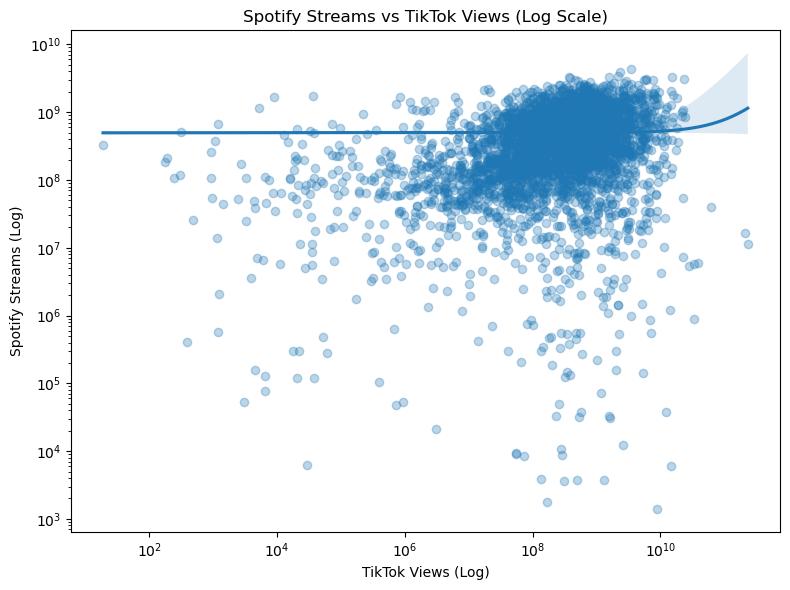

In [20]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="tiktok_views",
    y="spotify_streams",
    scatter_kws={"alpha":0.3}
)

plt.xscale("log")
plt.yscale("log")

plt.title("Spotify Streams vs TikTok Views (Log Scale)")
plt.xlabel("TikTok Views (Log)")
plt.ylabel("Spotify Streams (Log)")

plt.tight_layout()
plt.show()


### Interpretation – TikTok vs Streams

After applying a log transformation, a clearer positive relationship appears.

Tracks with higher TikTok views generally achieve higher Spotify streams.

However, the dispersion indicates TikTok exposure alone does not fully determine streaming success.


## Analysis 4 – Correlation Matrix of Numeric Features

This analysis examines the strength of linear relationships between Spotify streams and other numeric variables.


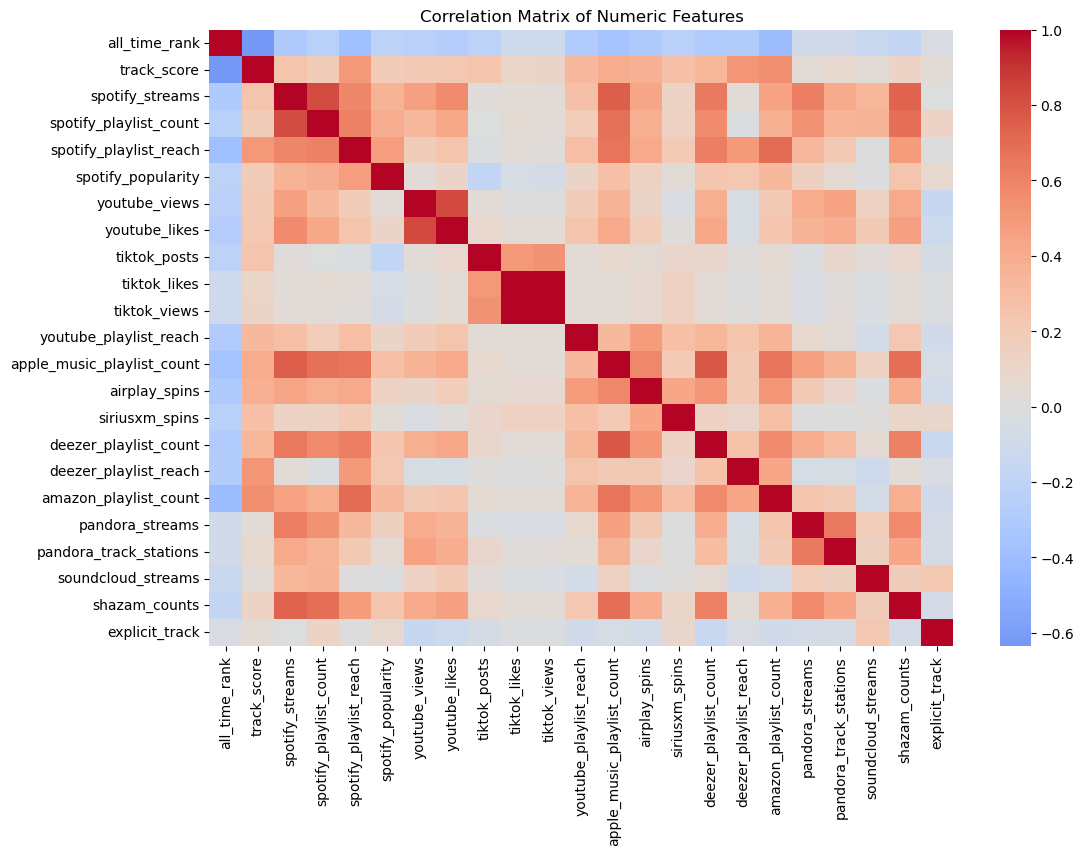

In [21]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(12,8))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Interpretation – Correlation Analysis

Spotify streams show strong positive correlations with:

- Spotify playlist reach
- Apple Music playlist count
- Deezer playlist reach
- Shazam counts
- YouTube views

TikTok views show a positive but weaker correlation compared to playlist metrics.

Explicit content does not appear to significantly influence streaming performance.


In [22]:
top_10 = df.sort_values("spotify_streams", ascending=False).head(10)

top_10[[
    "track",
    "artist",
    "spotify_streams",
    "spotify_playlist_reach",
    "tiktok_views",
    "youtube_views",
    "shazam_counts"
]]


,track,artist,spotify_streams,spotify_playlist_reach,tiktok_views,youtube_views,shazam_counts
55,Blinding Lights,The Weeknd,4.281469e+09,165544011.0,3.501177e+09,8.338071e+08,28994660.0
4254,Blinding Lights,xSyborg,4.261328e+09,NaN,NaN,NaN,NaN
53,Shape of You,Ed Sheeran,3.909459e+09,148037882.0,2.320856e+09,8.013997e+09,1146246.0
1637,Shape of You,xSyborg,3.888356e+09,NaN,NaN,NaN,NaN
132,Someone You Loved,Lewis Capaldi,3.427499e+09,160553919.0,2.161032e+09,2.153702e+09,29266297.0
114,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3.358704e+09,123917182.0,1.597454e+09,2.763189e+09,1569935.0
19,As It Was,Harry Styles,3.301815e+09,169783402.0,1.540588e+10,8.008993e+08,14967379.0
3406,As It Was,Harry Styles,3.299082e+09,1.0,NaN,NaN,NaN
262,Starboy,The Weeknd,3.291262e+09,98022646.0,3.754982e+08,2.829991e+09,15648166.0
519,One Dance,Drake,3.192204e+09,131832723.0,3.885441e+08,4.568069e+08,21316589.0


In [23]:
df_unique = df.sort_values("spotify_streams", ascending=False) \
              .drop_duplicates(subset=["track", "artist"])

top_10_unique = df_unique.head(10)

top_10_unique[[
    "track",
    "artist",
    "spotify_streams",
    "spotify_playlist_reach",
    "tiktok_views",
    "youtube_views",
    "shazam_counts"
]]


,track,artist,spotify_streams,spotify_playlist_reach,tiktok_views,youtube_views,shazam_counts
55,Blinding Lights,The Weeknd,4.281469e+09,165544011.0,3.501177e+09,8.338071e+08,28994660.0
4254,Blinding Lights,xSyborg,4.261328e+09,NaN,NaN,NaN,NaN
53,Shape of You,Ed Sheeran,3.909459e+09,148037882.0,2.320856e+09,8.013997e+09,1146246.0
1637,Shape of You,xSyborg,3.888356e+09,NaN,NaN,NaN,NaN
132,Someone You Loved,Lewis Capaldi,3.427499e+09,160553919.0,2.161032e+09,2.153702e+09,29266297.0
114,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3.358704e+09,123917182.0,1.597454e+09,2.763189e+09,1569935.0
19,As It Was,Harry Styles,3.301815e+09,169783402.0,1.540588e+10,8.008993e+08,14967379.0
262,Starboy,The Weeknd,3.291262e+09,98022646.0,3.754982e+08,2.829991e+09,15648166.0
519,One Dance,Drake,3.192204e+09,131832723.0,3.885441e+08,4.568069e+08,21316589.0
2397,STAY (with Justin Bieber),The Kid LAROI,3.107100e+09,2225897.0,NaN,NaN,15411173.0


In [24]:
comparison = pd.DataFrame({
    "Top 10 Avg Streams": [top_10_unique["spotify_streams"].mean()],
    "Overall Avg Streams": [df["spotify_streams"].mean()],
    "Top 10 Avg Playlist Reach": [top_10_unique["spotify_playlist_reach"].mean()],
    "Overall Avg Playlist Reach": [df["spotify_playlist_reach"].mean()],
    "Top 10 Avg TikTok Views": [top_10_unique["tiktok_views"].mean()],
    "Overall Avg TikTok Views": [df["tiktok_views"].mean()]
})

comparison


,Top 10 Avg Streams,Overall Avg Streams,Top 10 Avg Playlist Reach,Overall Avg Playlist Reach,Top 10 Avg TikTok Views,Overall Avg TikTok Views
0,3.601920e+09,4.473873e+08,1.249897e+08,2.334682e+07,3.678635e+09,1.161158e+09


### Final Insight – What Drives Top Streaming Performance

The top 10 streamed tracks significantly outperform the dataset average across all exposure metrics.

They receive:

~8x higher average streams

~5x higher playlist reach

~3x higher TikTok views

This suggests that multi-platform exposure (particularly playlist placement and TikTok visibility) plays a critical role in driving streaming success.

However, correlation does not imply causation — exposure likely amplifies already strong-performing tracks.

In [25]:
df.to_csv("../data/processed/spotify_final_for_tableau.csv", index=False)
